# Mini Project 3: Bank Fraud Detection

#### 1. Given the data below, please classify the two cluster data and find the boundary line to devide the two groups. Use visualization to show your answer. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn import datasets

X,Y = datasets.make_blobs(n_samples=200, n_features=2, centers=2, random_state=2)

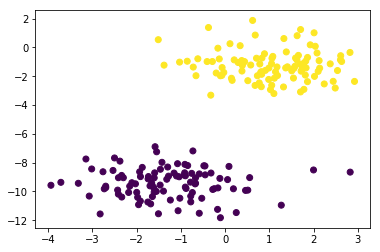

In [2]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [239]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf').fit(X,Y)

In [244]:
h=0.02 # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy=np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [245]:
np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)),axis=1)

array([[ -4.93955141, -12.82507855],
       [ -4.91955141, -12.82507855],
       [ -4.89955141, -12.82507855],
       ..., 
       [  3.88044859,   2.85492145],
       [  3.90044859,   2.85492145],
       [  3.92044859,   2.85492145]])

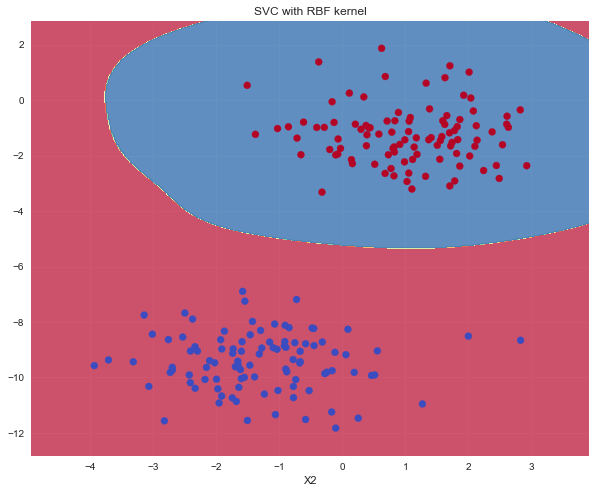

In [250]:
# Plot the decision boundary.
plt.figure(figsize=(10, 8))
z = svc.predict(np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)),axis=1))
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.Spectral, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
plt.xlabel('X1')
plt.xlabel('X2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVC with RBF kernel')

#### 2. In problem 1, we use classification method to classify two two-feature groups. What if the number of features increase? How can we use the method we learned from the class to solve more complicated problems. Following you will need to solve a Bank Fraud Detection Case where you will classify two multiple-feature groups.

**Data Description:**

**label.test.csv** - the test set, contains customer’s basic attributes and payment histories. You must predict whether these customers are credible or not.

**sample submission.csv** - a file showing the correct submission format. You must replace the NA’s with the predicted class labels. You should show your results by submitting the .csv file according to the format of this sample submission.csv.

**id**: A unique Id field which represents a customer

**X1**: Credit lineX2: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). X4: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. X6 = September, 2015;

**X7** = August, 2015;

**X11** =April, 2015. -1 = pay one month ahead; -2 = pay two month ahead; 0 = pay on time; Positive means the payment delayed months, 1 = delay 1 month, 2 = delay 2 months, etc.X12- X17: Amount in bill statement.

**X12** = amount of bill statementSeptember, 2015

**X13** = amount of bill statementAugust, 2015

**X17** = amount of bill statementApril, 2015. 

**X18-X23**: Amount of previous payment

**X18** = amount paid in September, 2015; X19 = amount paid in August, 2015; X23 = amount paid in April, 2015.

**Y**: A binary response variable to indicate whether the customer is creditable (1) or not (0).

This is a real problem to classify multi-feature data into two groups.


**Hint for steps**
1.	Load data
2.	There are so many features, please discern the categorical and continuous variables.
3.	Check if features have linear relationship between each other.
( You can google “Component Analysis with KMeans visuals – Kaggle” and learn how to do this step from Kaggle website)
4.	You don’t need to do PCA right now. 
5.	Choose the proper method to train the model:
binary classification Models: Logistic regression, Support vector machine, Naive Bayes, k-nearest neighbors, neural network, Decision tree…

6.	Evaluate your model. 
7.	Use your model to train the data. And make your submission file.


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
features = train.drop('Y', axis=1)
target = train['Y']

In [208]:
features.dtypes

id       int64
X1     float64
X2       int64
X3       int64
X4       int64
X5       int64
X6       int64
X7       int64
X8       int64
X9       int64
X10      int64
X11      int64
X12      int64
X13      int64
X14      int64
X15      int64
X16      int64
X17      int64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
dtype: object

In [251]:
features.isnull().sum()
# There are no missing values in this data set.

id     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64

In [254]:
catcols = []
numcols = []
for i in features.columns:
    if len(features[i].unique())<=15:
        catcols.append(i)
    else:
        numcols.append(i)       

In [255]:
print 'The categorical variables: ', catcols
print 'The continuous variables: ', numcols

The categorical variables:  ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']
The continuous variables:  ['id', 'X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


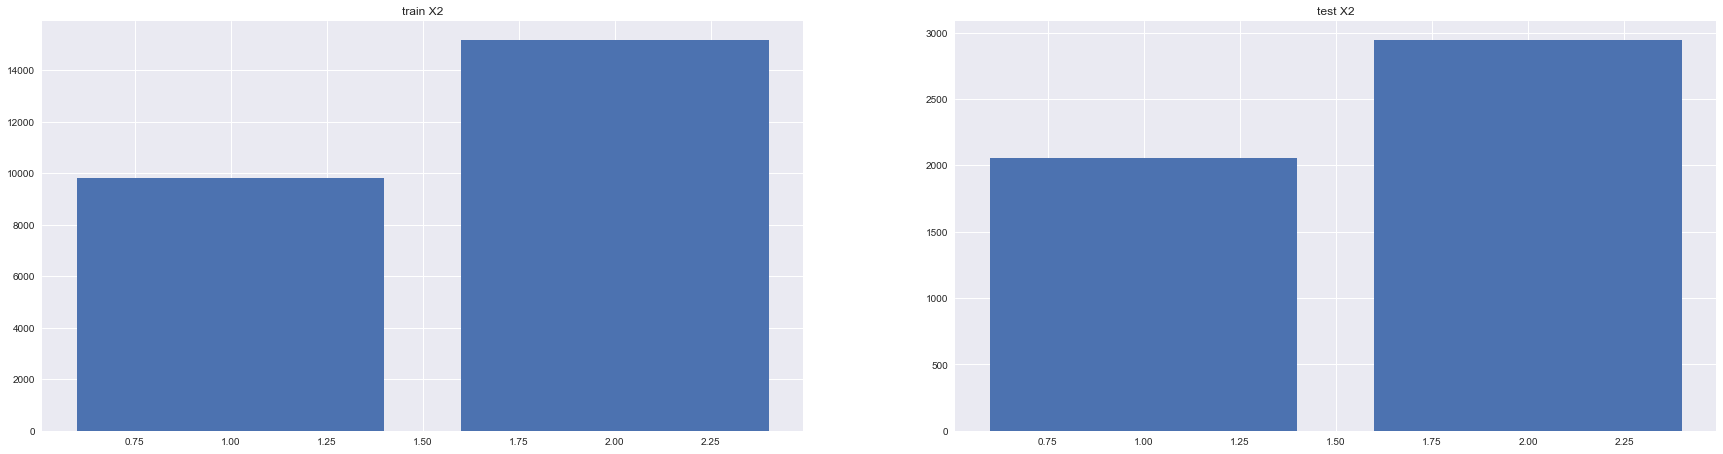

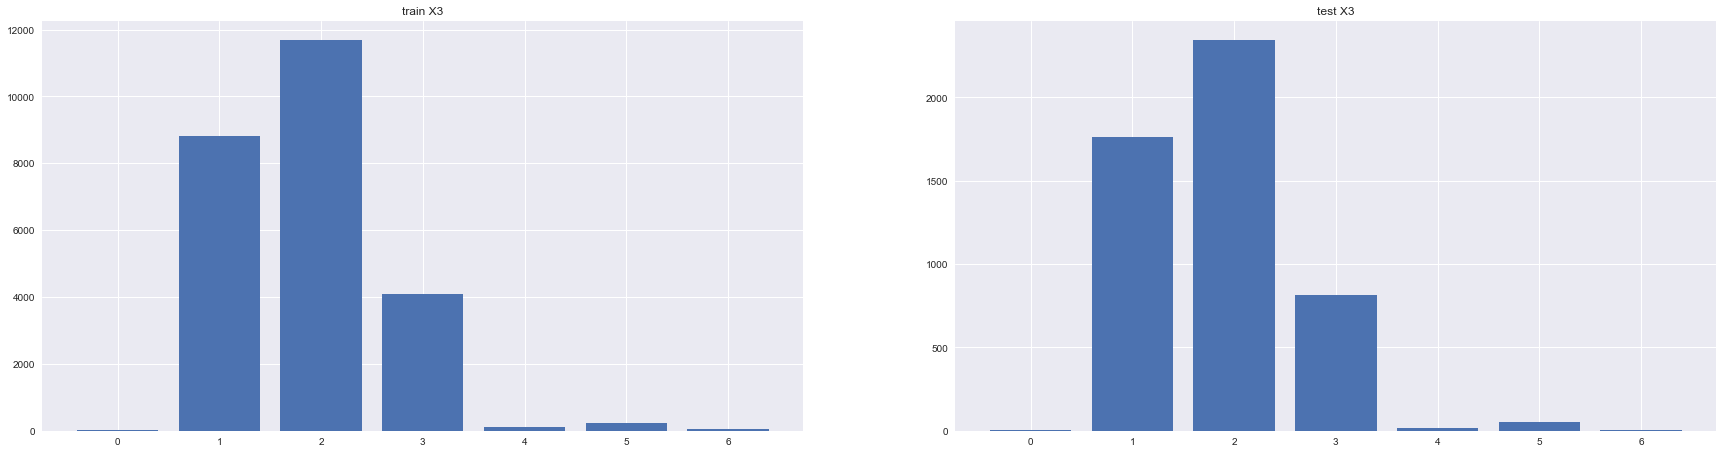

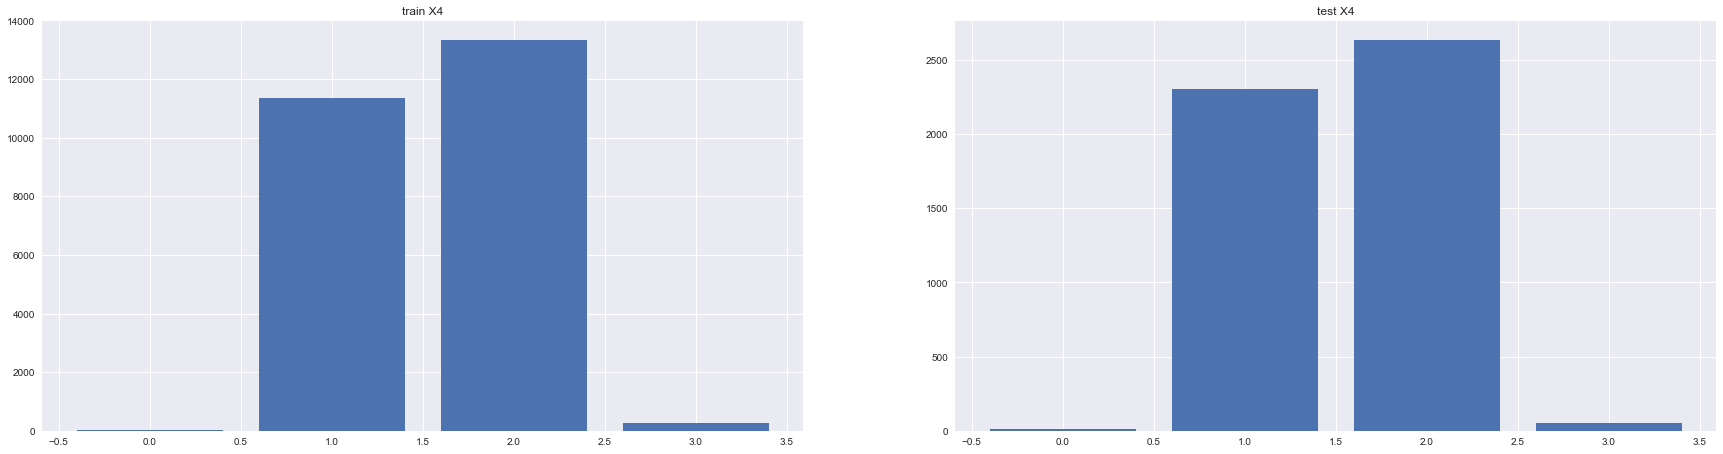

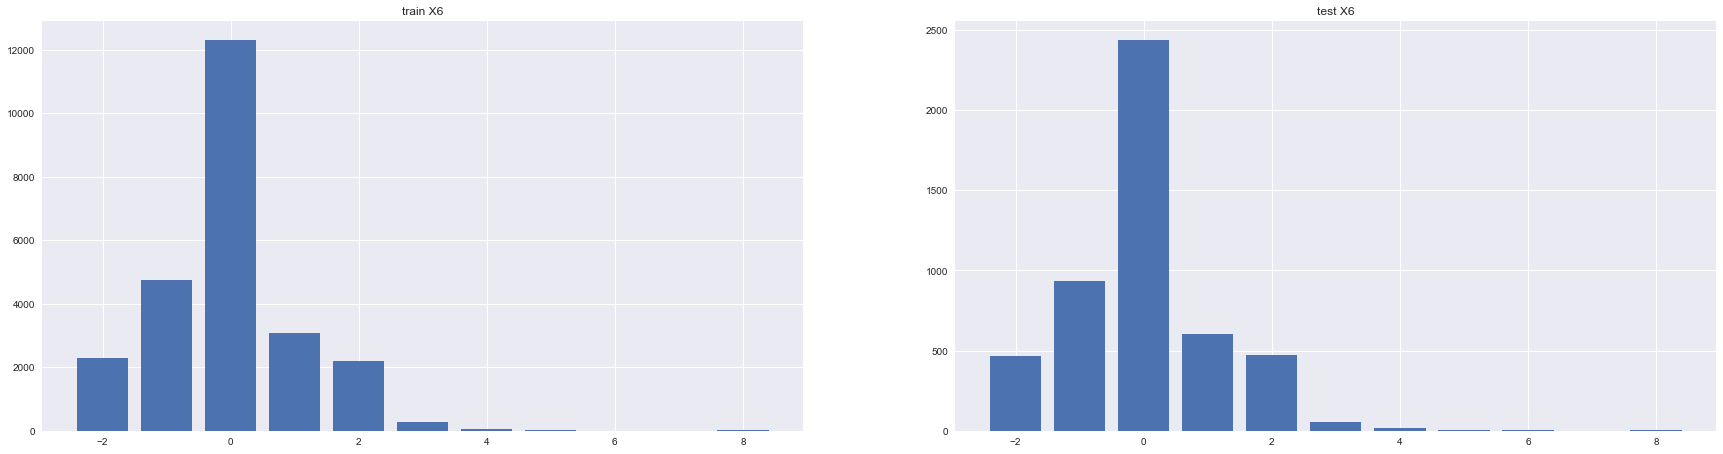

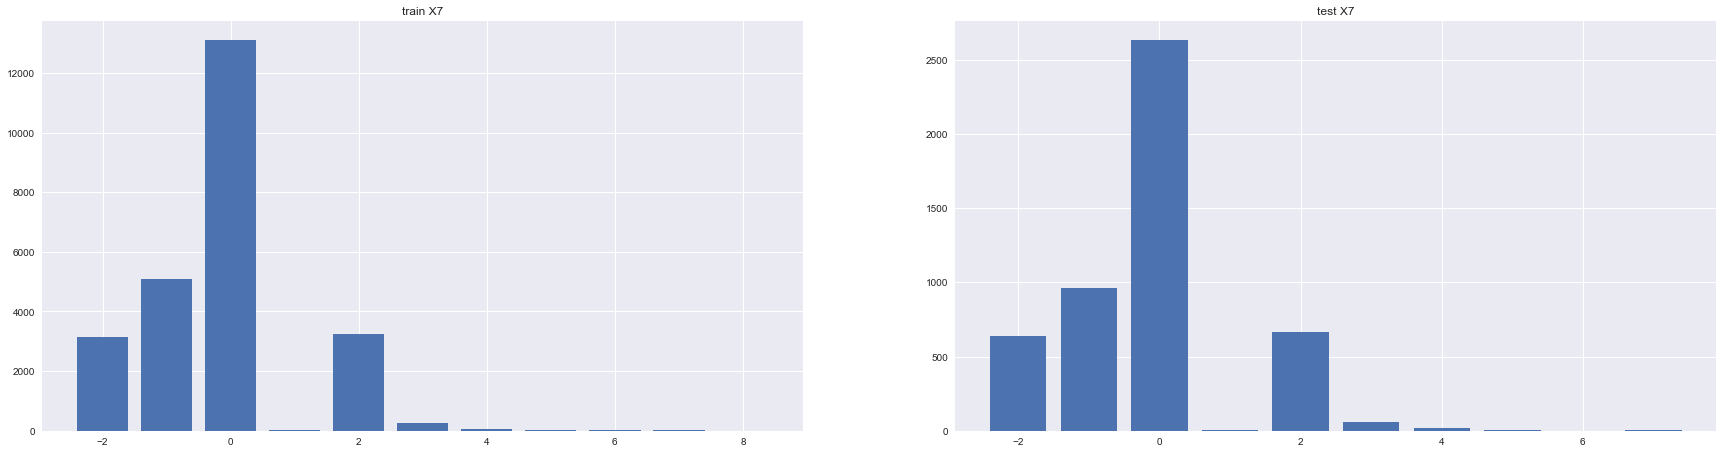

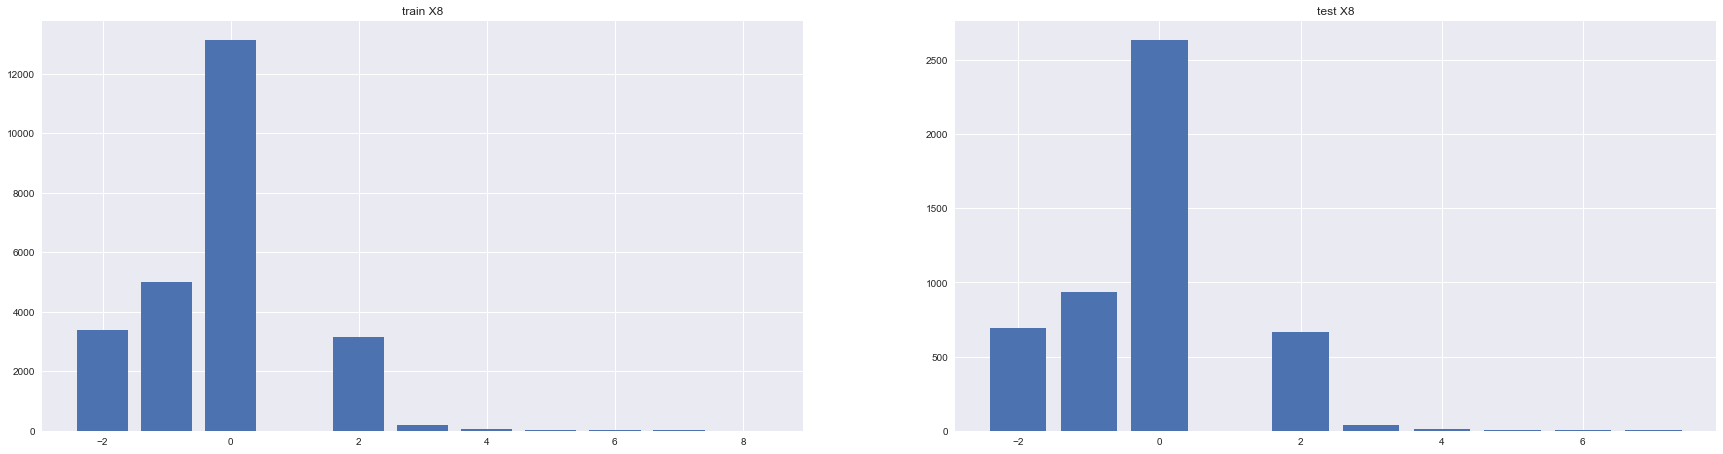

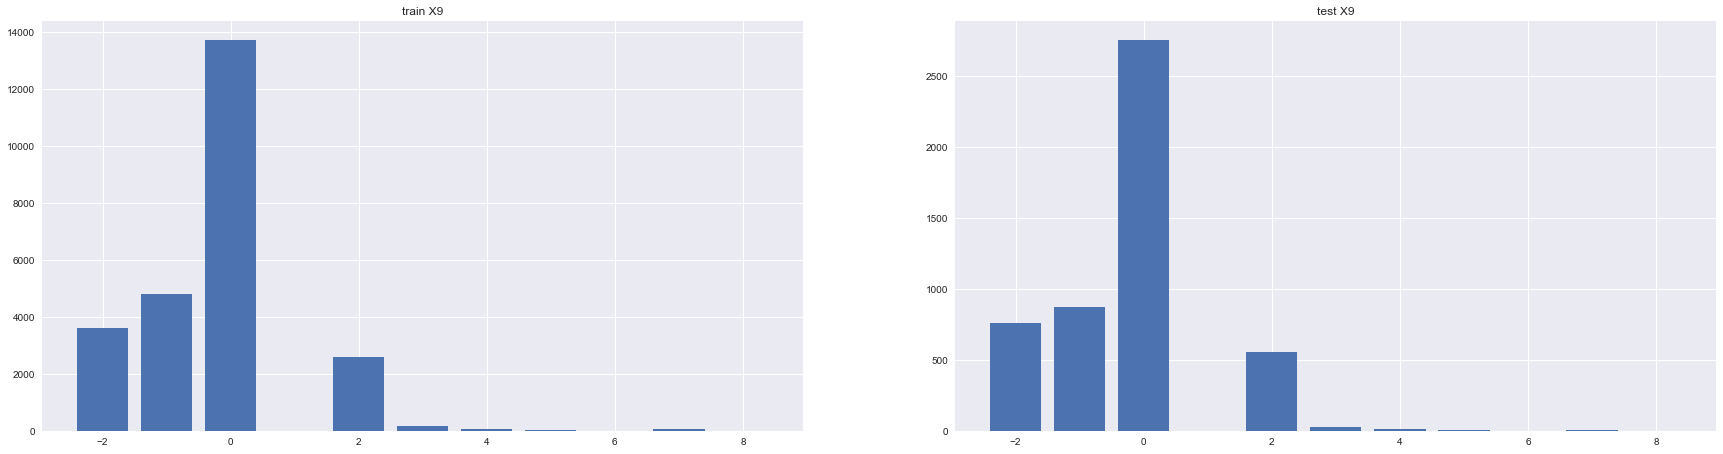

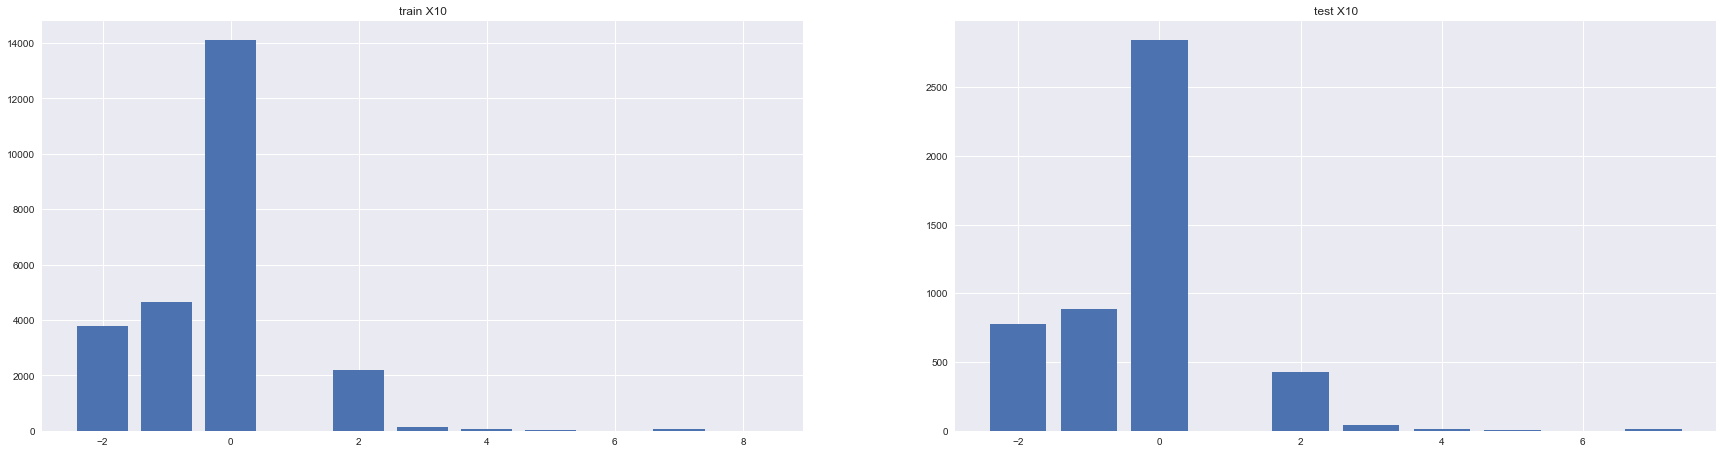

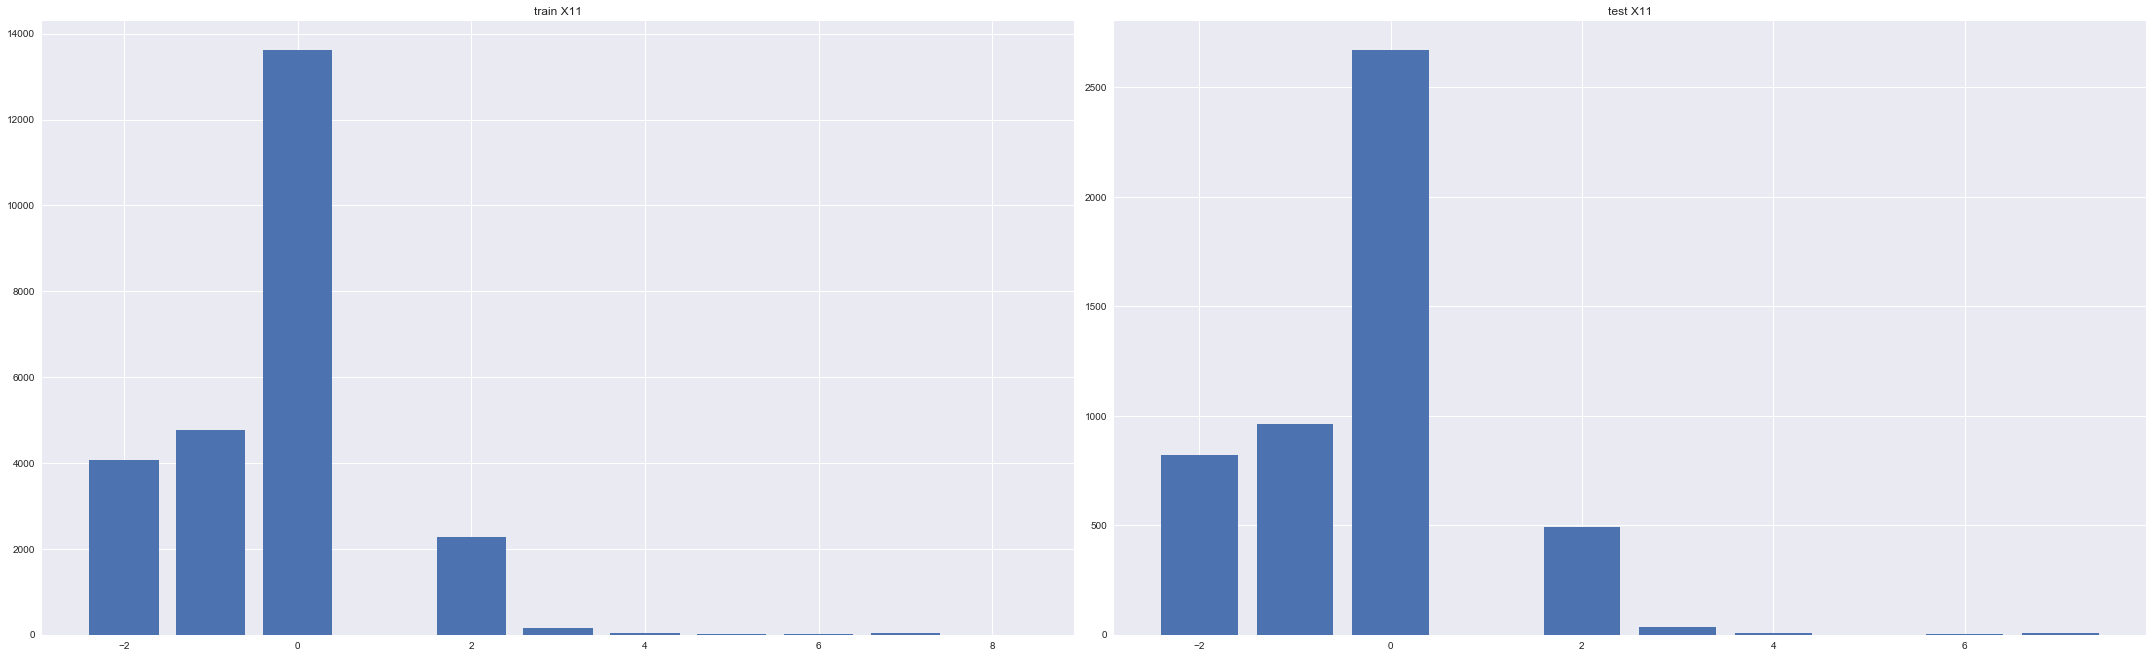

In [279]:
# Check the pattern difference between the training data and testing data
count=1
for i in range(len(catcols)):
    plt.figure(figsize=(30,80))
    plt.subplot(len(catcols), 2, count)
    plt.bar(features[catcols[i]].value_counts().index, features[catcols[i]].value_counts().values)
    plt.title("train "+catcols[i])
    
    plt.subplot(len(catcols),2,count+1)
    plt.bar(test[catcols[i]].value_counts().index, test[catcols[i]].value_counts().values)
    plt.title("test "+catcols[i])
    count += 2
plt.tight_layout()

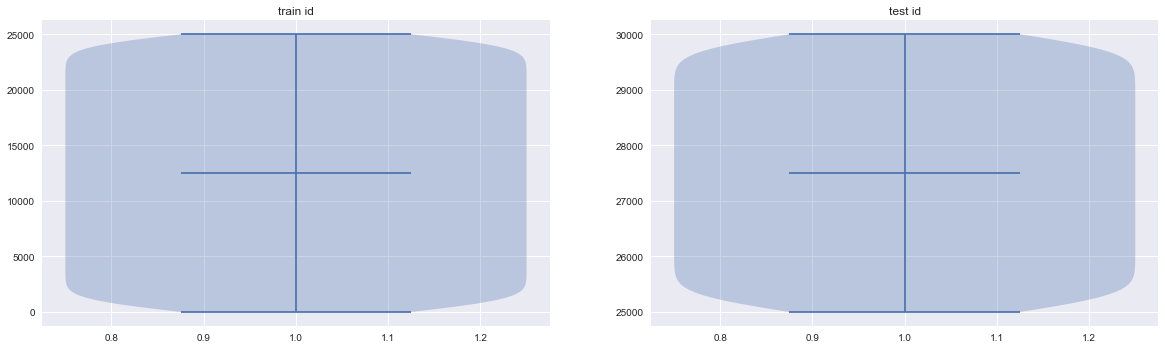

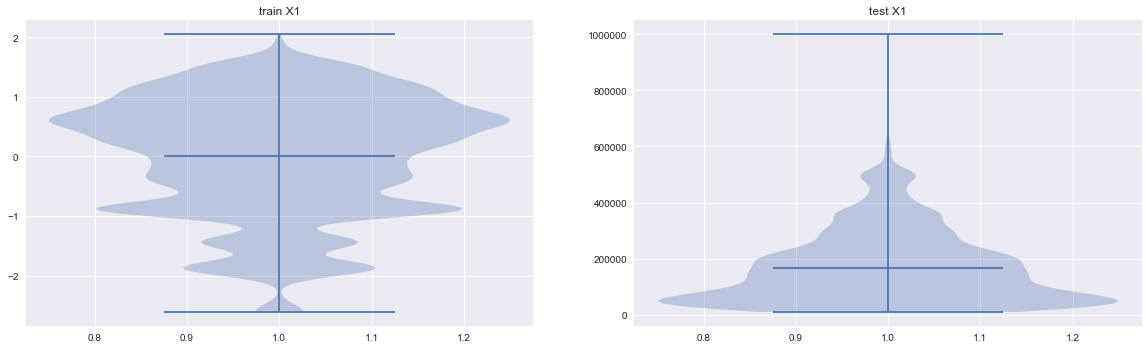

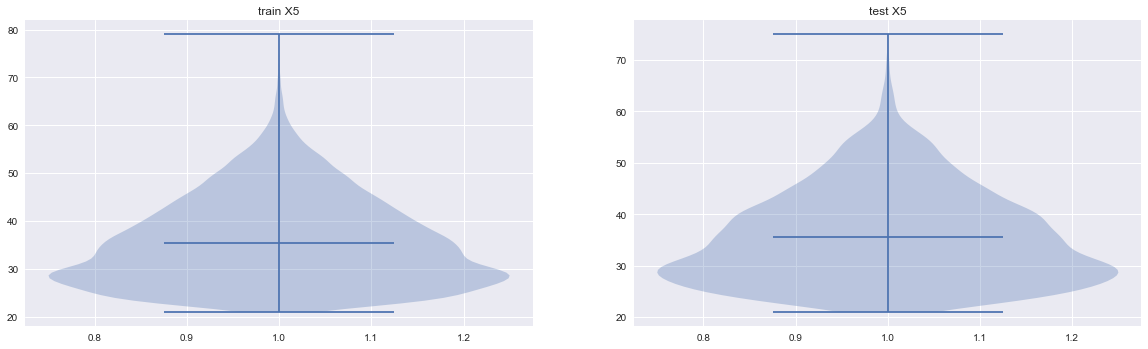

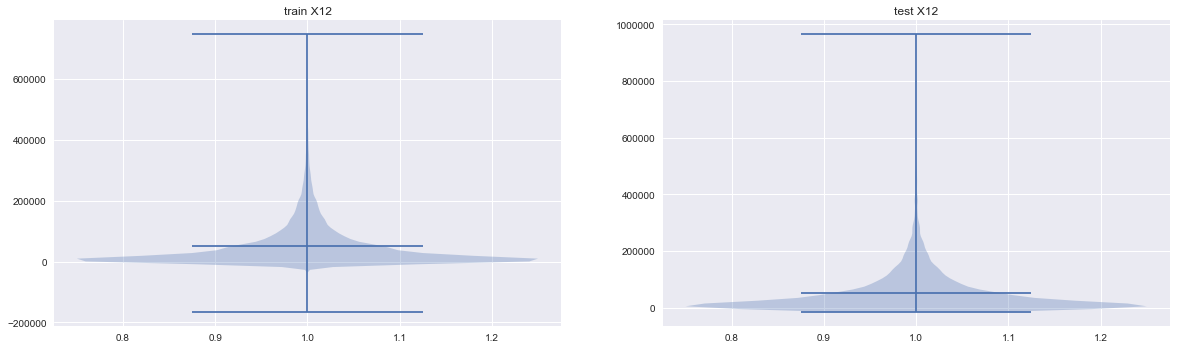

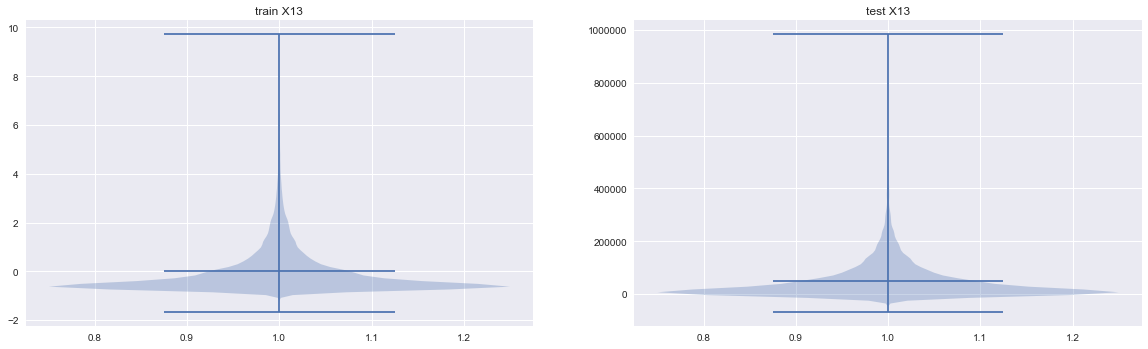

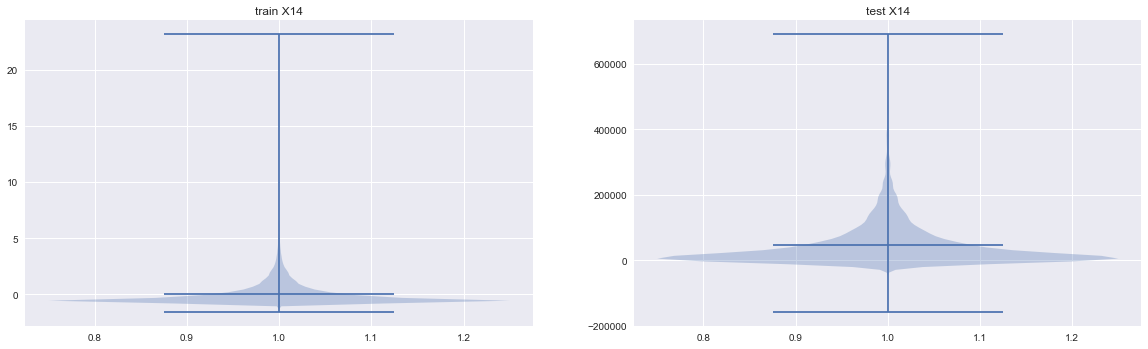

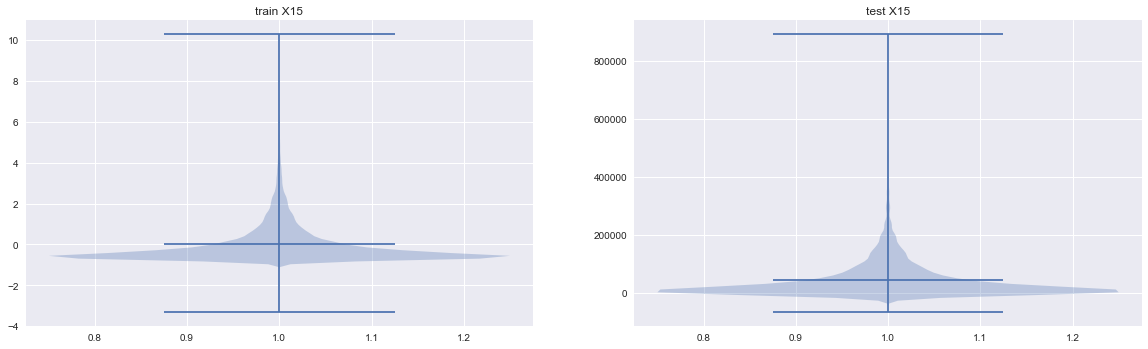

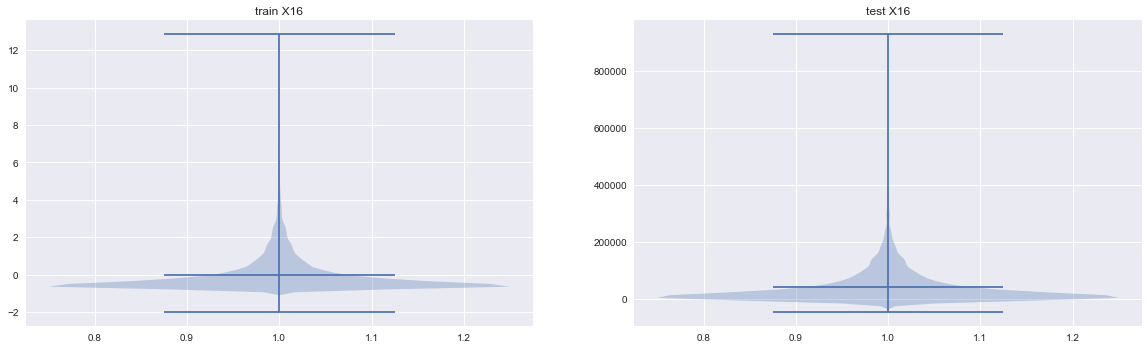

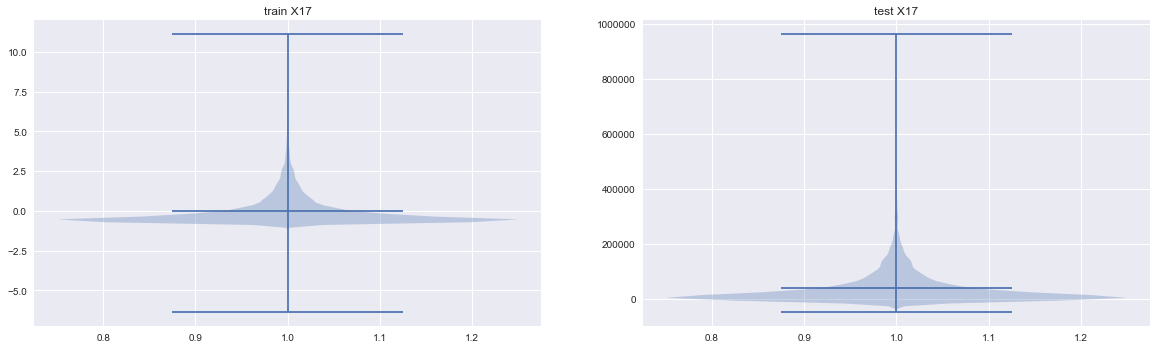

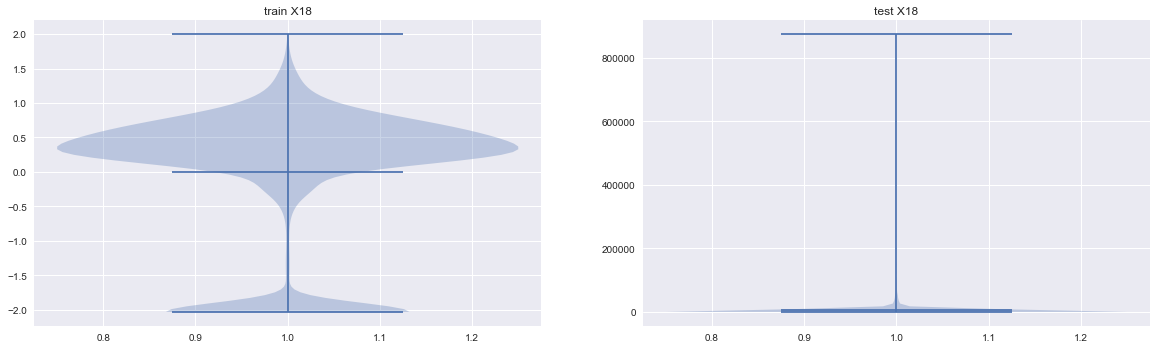

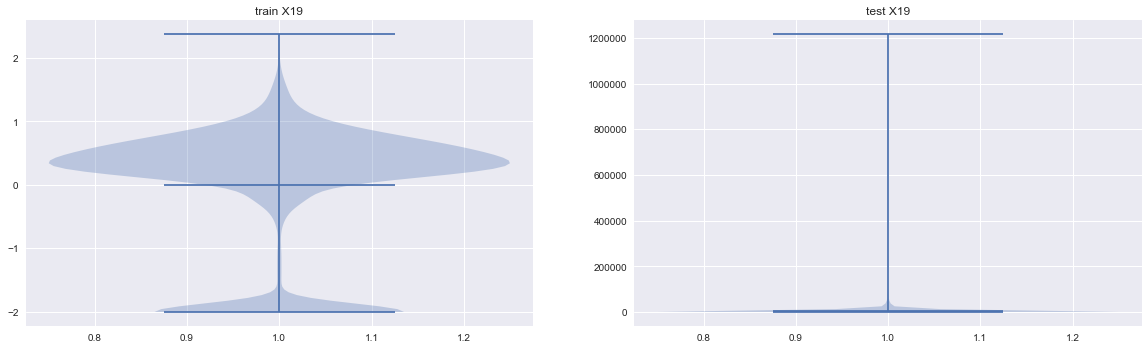

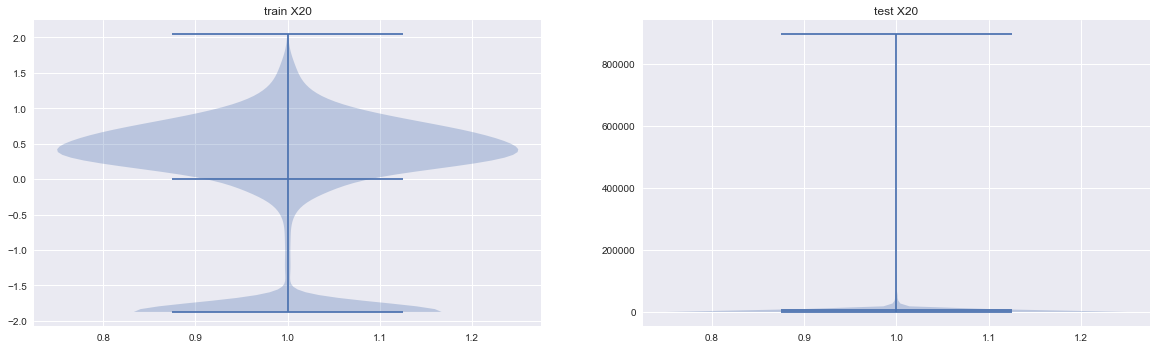

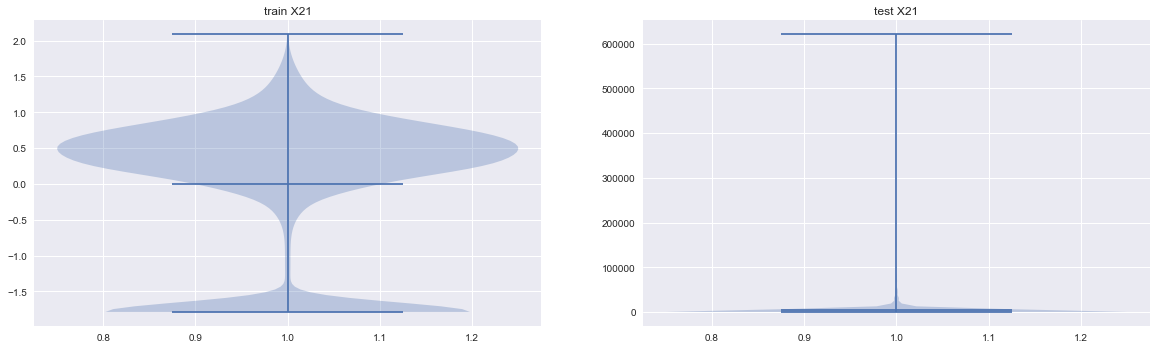

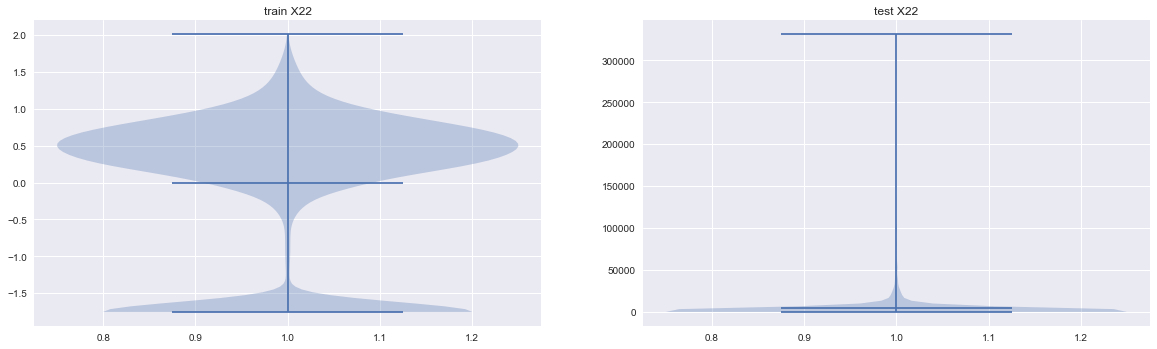

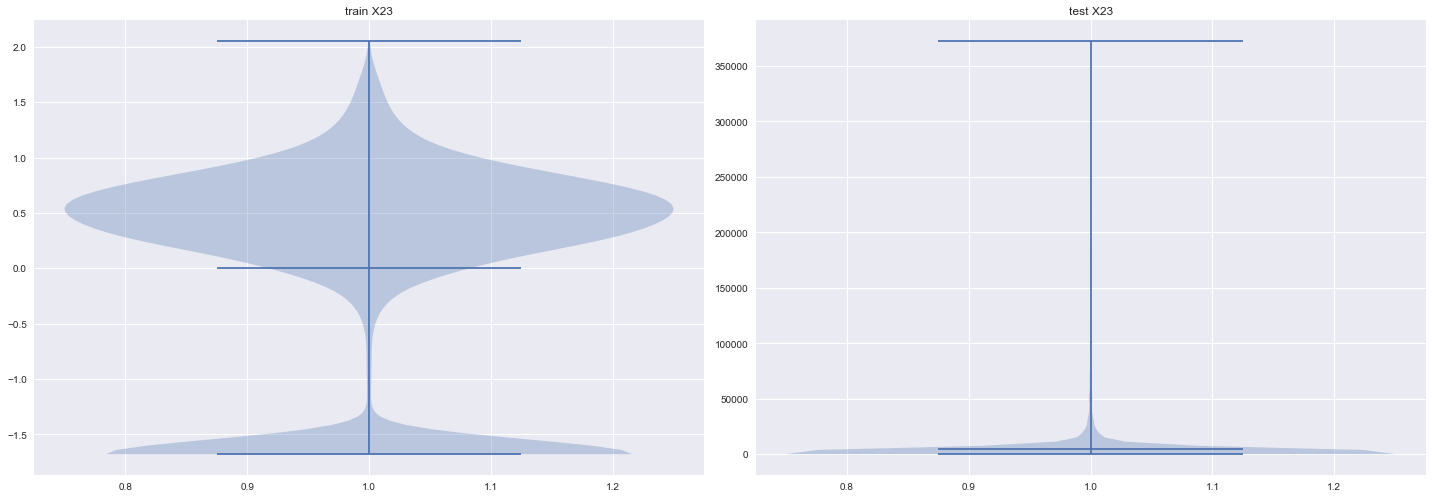

In [282]:

count=1
for i in range(len(numcols)):
    fig = plt.figure(figsize=(20,100))
    plt.subplot(len(numcols),2,count)
    plt.violinplot(features[numcols[i]],showmeans=True)
    plt.title("train "+numcols[i])
    
    plt.subplot(len(numcols),2,count+1)
    plt.violinplot(test[numcols[i]],showmeans=True)
    plt.title("test "+numcols[i])
    count+=2
plt.tight_layout()

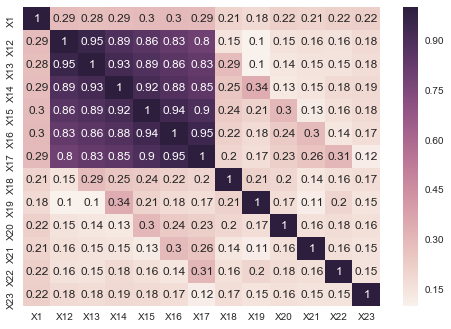

In [185]:
import seaborn as sns
sns.heatmap(features[numcols].corr(), annot=True)

In [356]:
# From the heatmap, we could see that X12, X13 ... to X17, they have strong linear relationship with each other. 
# So we just keep X12, and delete the rest.

dropcols = ['X13', 'X14', 'X15', 'X16', 'X17']
numcols = [i for i in numcols if i not in dropcols]

In [176]:
features[numcols].describe()

,X1,X12,X18,X19,X20,X21,X22,X23
count,25000.000000,25000.000000,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000
mean,167559.187200,51164.179640,5642.769880,5.975874e+03,5231.979040,4873.475160,4793.889240,5248.531440
std,129634.881264,73901.994909,15745.370388,2.293476e+04,16331.189806,15649.697239,15143.116895,17972.259959
min,10000.000000,-165580.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,3543.500000,977.250000,8.360000e+02,390.000000,291.000000,263.250000,117.750000
50%,140000.000000,22284.500000,2100.000000,2.008000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,66671.750000,5022.000000,5.000000e+03,4574.250000,4015.000000,4056.250000,4000.000000
max,800000.000000,746814.000000,505000.000000,1.684259e+06,508229.000000,528897.000000,426529.000000,528666.000000


In [285]:
# logarithm transformation
logcols=['X1', 'X18','X19','X20','X21','X22','X23']
features[logcols]=features[logcols].apply(lambda x:np.log(x+1))

In [357]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features[numcols] = scaler.fit_transform(features[numcols])

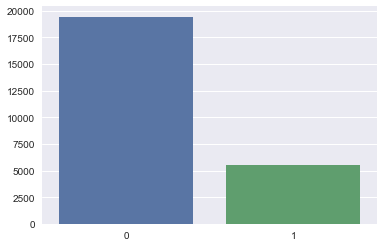

In [290]:
# Check the pattern of the label
sns.barplot(x=target.value_counts().index, y=target.value_counts().values)

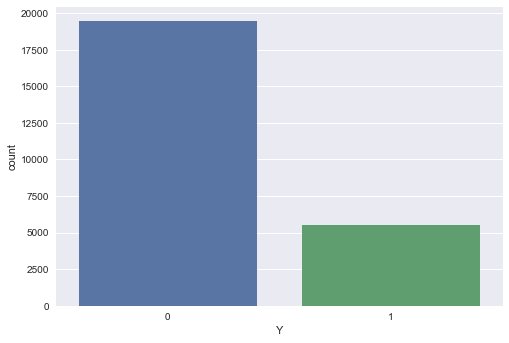

In [8]:
import seaborn as sns
sns.countplot(target)

In [375]:
from sklearn.model_selection import train_test_split
features.drop('id',axis=1,inplace=True)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=18)

In [377]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

clf1 = LogisticRegression(class_weight={0:1, 1:3})
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier(class_weight = {0:1, 1:3})

In [378]:
# Build a baseline model
from sklearn import metrics
def evaluation_score(clf):
    clf = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    return (metrics.classification_report(y_test, y_pred))

In [379]:
print 'LogisticRegression: \n {}'.format(evaluation_score(clf1))
print 'KNeighborsClassifier: \n {}'.format(evaluation_score(clf2))
print 'Rondom Forest: \n {}'.format(evaluation_score(clf3))

LogisticRegression: 
              precision    recall  f1-score   support

          0       0.87      0.81      0.84      3887
          1       0.46      0.58      0.52      1113

avg / total       0.78      0.76      0.77      5000

KNeighborsClassifier: 
              precision    recall  f1-score   support

          0       0.83      0.92      0.87      3887
          1       0.55      0.36      0.44      1113

avg / total       0.77      0.79      0.78      5000

Rondom Forest: 
              precision    recall  f1-score   support

          0       0.82      0.96      0.89      3887
          1       0.65      0.29      0.40      1113

avg / total       0.79      0.81      0.78      5000



In [380]:
# Build a baseline model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
def search_model(x_train, y_train, est, param_grid, n_jobs, cv):
    model = GridSearchCV(estimator  = est,
                                     param_grid = param_grid,
                                     scoring = 'f1_weighted',
                                     n_jobs = n_jobs,
                                     iid = True,
                                     cv = cv)
    # Fit Grid Search Model
    model.fit(x_train, y_train)   
    return model

In [381]:
param_grid = {'n_estimators':[100,300,500],
             'criterion':['gini', 'entropy']}

RF = search_model(features
            , target
            , clf3
            , param_grid
            , -1
            , 5)

In [382]:
print("Best score: %0.3f" % RF.best_score_)
print("Best parameters set:", RF.best_params_)
print("Best estomator:", RF.best_estimator_) 

Best score: 0.794
('Best parameters set:', {'n_estimators': 500, 'criterion': 'entropy'})
('Best estomator:', RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 3},
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))


In [383]:
param_grid = {'n_neighbors':[5,10,15]}

KNN = search_model(features
            , target
            , clf2
            , param_grid
            , -1
            , 5)

In [384]:
print("Best score: %0.3f" % KNN.best_score_)
print("Best parameters set:", KNN.best_params_)
print("Best estomator:", KNN.best_estimator_) 

Best score: 0.784
('Best parameters set:', {'n_neighbors': 15})
('Best estomator:', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform'))


In [385]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression (class_weight = {0:1, 1:3})
clf2 = KNeighborsClassifier(n_neighbors=15)
clf3 = RandomForestClassifier(n_estimators = 500, criterion = 'entropy',class_weight = {0:1, 1:3})
# results from your gridsearch
eclf = VotingClassifier(estimators=[('Random_Forest',clf3), ('KNN', clf2),('Logistic', clf1)], voting='hard')
for clf, label in zip([clf1, clf2, clf3, eclf], ['Random_Forest', 'KNN','Logistic', 'Ensemble']):
    scores = cross_val_score(clf, features, target, cv=3, scoring='f1_weighted')
    print ("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.77 (+/- 0.01) [Random_Forest]
Accuracy: 0.78 (+/- 0.00) [KNN]
Accuracy: 0.79 (+/- 0.00) [Logistic]
Accuracy: 0.80 (+/- 0.00) [Ensemble]


In [387]:
eclf.fit(features, target)
pred = eclf.predict(test.drop('id', axis=1))
df = pd.DataFrame({'id':test['id'], 'y': pred})
df.to_csv('Submmission.csv', index=False)